![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# 1. Points and lines

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Dot Product

In [ ]:
m1 = [10,20,1] #(x1,y1) = (10,20)
m2 = [20,30,1] #(x2,y2) = (20,30)
print(np.dot(m1,m2))

801


## Cross Product

In [ ]:
m1 = [10,20,1]
m2 = [20,30,1]
print(np.cross(m1,m2))

[ -10   10 -100]


## Ploting points and lines

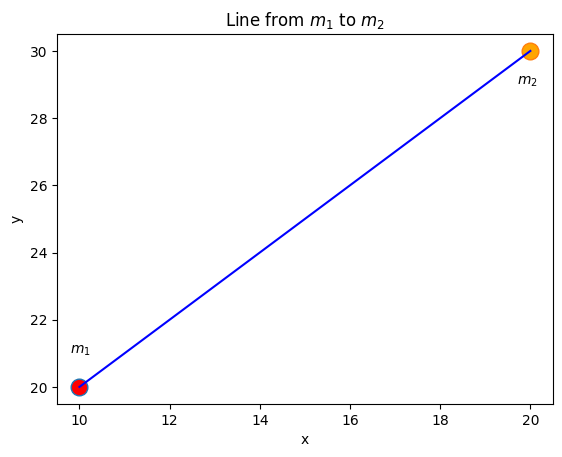

In [ ]:
m1 = [10,20,1]
m2 = [20,30,1]

xs = [m1[0], m2[0]]
ys = [m1[1], m2[1]]

plt.text(xs[0]-.2, ys[0]+1, '$m_1$')
plt.plot(xs[0], ys[0], marker='o', markerfacecolor='red', markersize=12)

plt.text(xs[1]-.3, ys[1]-1, '$m_2$')
plt.plot(xs[1], ys[1], marker='o', markerfacecolor='orange', markersize=12)

plt.plot(xs,ys,color='blue')
plt.xlabel('x')
plt.ylabel('y')

plt.title('Line from $m_1$ to $m_2$')
plt.show()

# 2. Equation of a straight line from two points

If the first 2D point in homogeneous coordinates is ${\bf m}_1 = [x_1 \ y_1 \ 1]^{\sf T}$, and the second is ${\bf m}_2 = [x_2 \ y_2 \ 1]^{\sf T}$, then the definition of the straight line passing through both points is:

$\ell = {\bf m}_1 \times {\bf m}_2 = [a \ b \ c]^{\sf T}$.

That is, the equation of the line is:

$ax + by + c = 0$.



In [ ]:
m1 = [10,20,1]
m2 = [20,30,1]

ell = np.cross(m1,m2) # <==== recta que pasa por ambos puntos
a   = ell[0]
b   = ell[1]
c   = ell[2]

print('ell      = ',ell)
print('(a,b,c) = ',(a,b,c))

# a*x + b*y + c = 0
# y = -(a*x+c)/b

ell      =  [ -10   10 -100]
(a,b,c) =  (-10, 10, -100)


## Evaluation of the equation of a straight line at x = 14

(x,y)= (14, 24.0)


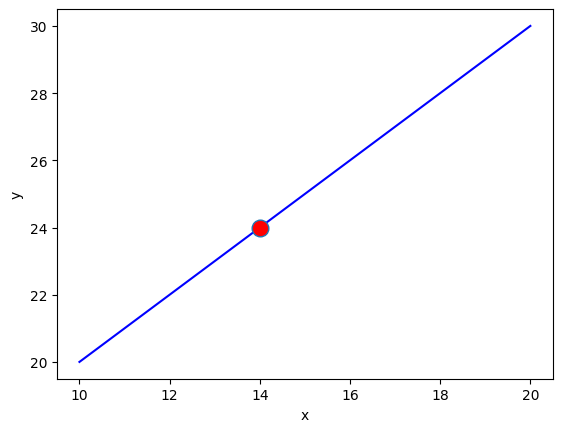

In [ ]:
m1 = [10,20,1]
m2 = [20,30,1]

xs = [m1[0], m2[0]]
ys = [m1[1], m2[1]]


ell = np.cross(m1,m2) # <==== straight line that contains m1 and m2
a   = ell[0]
b   = ell[1]
c   = ell[2]

plt.plot(xs,ys,color='blue')
plt.xlabel('x')
plt.ylabel('y')

x = 14
y = -(a*x+c)/b

plt.plot(x, y, marker='o', markerfacecolor='red', markersize=12)

print('(x,y)=',(x,y))

# Intersection of two straight lines

If the first 2D line in homogeneous coordinates is ${\bf \ell}_1 = [a_1 \ b_1 \ c_1]^{\sf T}$, and the second is ${\bf \ell}_2 = [a_2 \ b_2 \ c_2]^{\sf T}$, then the definition of the intersection passing through both lines is:

${\bf m}_i = {\bf \ell}_1 \times {\bf \ell}_2 = [p \ q \ r]^{\sf T}$.

That is, the point is:

$x_i = \frac{p}{r}$

$y_i = \frac{q}{r}$



## Straight line 1

In [ ]:
ell_1 = [1, -1, 10] # la recta del ejercicio anterior

## Straight line 2

In [ ]:
ell_2 = [1,1,-40]

## Plot

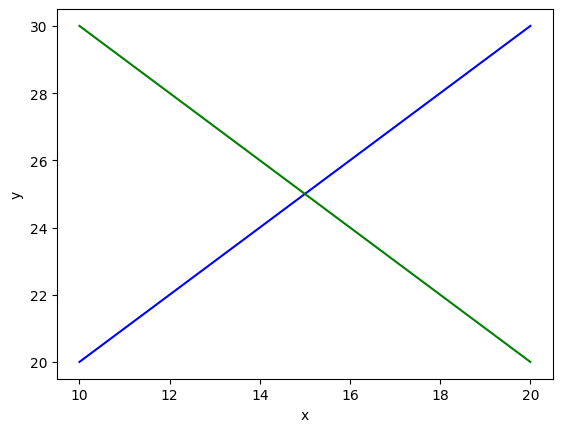

In [ ]:
# Line 1
a1   = ell_1[0]
b1   = ell_1[1]
c1   = ell_1[2]

x1 = np.array([10,20])
y1 = -(a1*x1+c1)/b1

plt.plot(x1,y1,color='blue')

# Line
a2   = ell_2[0]
b2   = ell_2[1]
c2   = ell_2[2]

x2 = np.array([10,20])
y2 = -(a2*x2+c2)/b2

# Plot
plt.plot(x2,y2,color='green')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Intersection

(xi,yi) =  (15.0, 25.0)


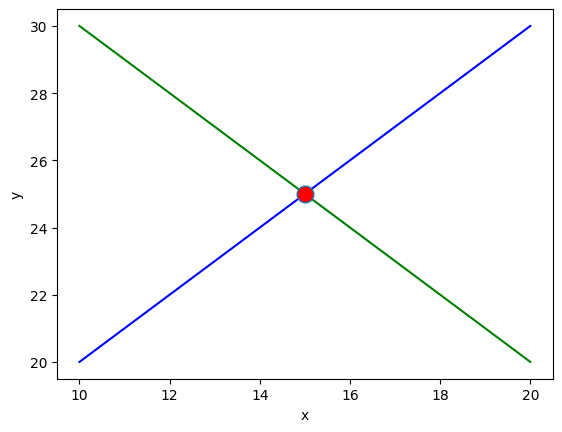

In [ ]:
mi = np.cross(ell_1,ell_2) # <==== intersection of both lines

xi = mi[0]/mi[2]
yi = mi[1]/mi[2]
print('(xi,yi) = ',(xi,yi))


plt.plot(x1,y1,color='blue')
plt.plot(x2,y2,color='green')
plt.plot(xi, yi, marker='o', markerfacecolor='red', markersize=12)

plt.xlabel('x')
plt.ylabel('y')
plt.show()



# Points and Lines in Images

## Image

In [ ]:
import cv2
!wget https://www.dropbox.com/s/g4hee0epvla4n5j/JohnLennon.jpg

--2023-08-10 16:59:16--  https://www.dropbox.com/s/g4hee0epvla4n5j/JohnLennon.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/g4hee0epvla4n5j/JohnLennon.jpg [following]
--2023-08-10 16:59:17--  https://www.dropbox.com/s/raw/g4hee0epvla4n5j/JohnLennon.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc594d5a86aae1d1fd648d56b956.dl.dropboxusercontent.com/cd/0/inline/CBgBWP7NQTGHyuCu94IGPxhYPL2Mzn6ACDQqoKhx3DWHKJPcMdVOtjedmkb_NjOqpafs5KpRigXnWcBnPwHlgzVbBG10zAh-yPs6i_HUSUnaSt4Ce5A3jCZXYEyx6RliikY/file# [following]
--2023-08-10 16:59:17--  https://uc594d5a86aae1d1fd648d56b956.dl.dropboxusercontent.com/cd/0/inline/CBgBWP7NQTGHyuCu94IGPxhYPL2Mzn6ACDQqoKhx3DWHKJPcMdVOtjedmkb_NjOqpafs5KpRigXnWcBnPwHlgzVbBG10zAh-yPs6i_HUSUnaSt4Ce5A3

## Display the image

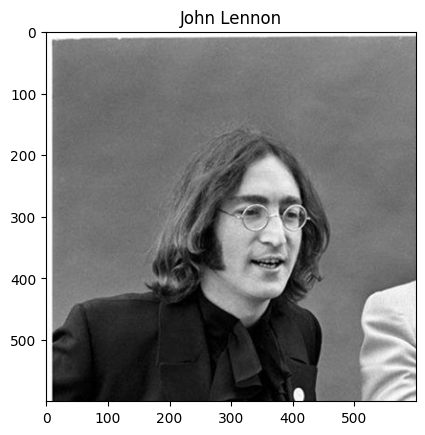

In [ ]:
I = cv2.imread('JohnLennon.jpg')
plt.imshow(I)
plt.title('John Lennon')
plt.show()

## Points on the image

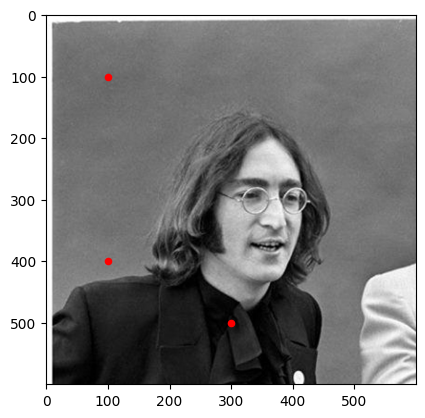

In [ ]:
plt.imshow(I)
x = [100,100,300]
y = [100,400,500]
plt.scatter(x, y, s=20,c='red')
plt.show()

### Lines on the image


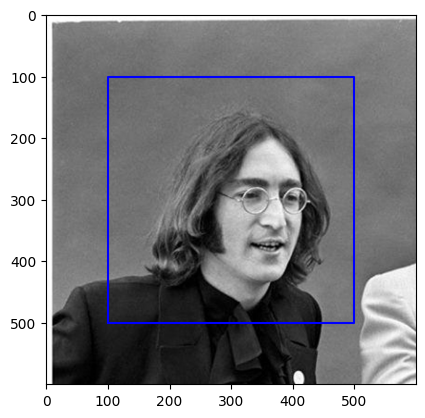

In [ ]:
I = cv2.imread('JohnLennon.jpg')
plt.imshow(I)
x = [100,100,500,500,100]
y = [500,100,100,500,500]
plt.plot(x, y, c='blue')
plt.show()

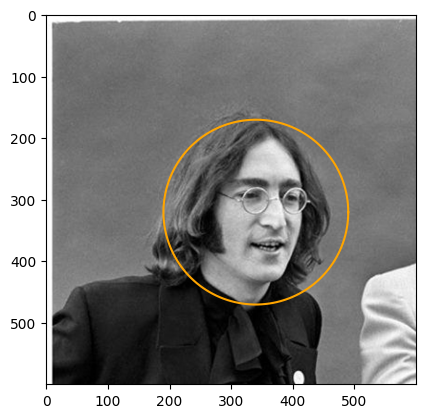

In [ ]:
I = cv2.imread('JohnLennon.jpg')
plt.imshow(I)

N = 300 # sides of the polygon
x = np.zeros((N+1,))
y = np.zeros((N+1,))
(xc,yc) = (340,320)
r = 150
for i in range(N+1):
  t    = 2*np.pi/N*i
  x[i] = xc + r*np.cos(t)
  y[i] = yc + r*np.sin(t)

plt.plot(x, y, c='orange')
plt.show()